# Process of Data Science Project
## CSCI 4146
## Summer 2018
## Orjan Monsen
## B00697153

This project aims to predict Bench Press results for athletes competing in powerlifting competitions by analysing the athlete's lower body strength, gender, age, bodyweight, weight class, division, and competition placing. 

### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import math
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

% matplotlib inline

### Data Collection
The dataset is retrieved from: https://www.kaggle.com/open-powerlifting

The kaggle dataset is a  sample from: https://www.openpowerlifting.org/

### Import dataset

In [2]:
df = pd.read_csv('openpowerlifting.csv')

### Display Dataset

In [3]:
df.head(10)

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
5,0,Courtney Norris,F,Wraps,28.0,Open Senior,62.41,67.5,-183.7,170.10,NaN,77.11,NaN,145.15,392.36,1,424.40
6,0,Maureen Clary,F,Raw,60.0,Mst 60-64,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
7,0,Maureen Clary,F,Raw,60.0,Open Senior,67.31,67.5,NaN,124.74,NaN,95.25,NaN,163.29,383.28,1,391.98
8,0,Priscilla Sweat Pardue,F,Wraps,52.0,50-54,65.95,67.5,NaN,120.20,NaN,54.43,NaN,108.86,283.49,1,294.25
9,0,Priscilla Sweat Pardue,F,Raw,52.0,Senior,65.95,67.5,NaN,NaN,NaN,NaN,NaN,108.86,108.86,1,112.99


In [4]:
df.shape

(386414, 17)

## Understanding the Data
Let's investigate what each data column contains, and what the column values actually are (column decriptions).

In [5]:
df.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')

#### MeetID
The ID of the competition / meet.

#### Name
The name of the athlete.

#### Sex
The gender of the athlete.

#### Equipment
The equipment used by the athlete during the competition. Can be any of the following categories:

##### Raw
Only allowed to use approved lifting belts, wrist wraps, knee sleeves, and chalk.

##### Wraps
Indicates if wrist wraps were used.

##### Straps
Indicates if lifting straps (to improve the grip) were used.

##### Single-ply
Allowed to use Powerlifting Bodysuits with <b>1 layer</b> of high tensile strength fabric, which is designed to stretch to a given point and then snap back into place.

##### Multi-ply
Allowed to use Powerlifting Bodysuits with <b>2 or more</b> layer of high tensile strength fabric, which is designed to stretch to a given point and then snap back into place.

#### Age
The age of the athlete.

#### Division
The powerlifting division that the athlete competed in. The weightclasses are:
- Women: 47 kg, 52 kg, 57 kg, 63 kg, 72 kg, 84 kg, 84 kg+
- Men: 59 kg, 66 kg, 74 kg, 83 kg, 93 kg, 105 kg, 120 kg, 120 kg+

This dataset also keeps track of certain agegroups such as:
- teens 18-19
- open senior
- mst 45-49

#### BodyweightKg
The weight of the athlete in kilograms.

#### WeightClassKg
The weightclass the athlete competed in.

#### Squat4Kg


#### BestSquatKg
The athlete's personal best squat result.

#### Becnh4Kg

#### BestBenchKg
The athlete's personal best bench result.

#### Deadlift4Kg

#### BestDeadliftKg
The athlete's personal best deadlift result.

#### TotalKg
TotalKg = BestSquatKg + BestBenchKg + BestDeadliftKg

#### Place
The place of the athlete in the competition (e.g. 1st place)

#### Wilks
The Wilk coefficient for the athlete. This is a score that can be used to measure the strength of a powerlifter against other powerlifters despite the different weights of the lifters. The formula is authored by Robert Wilks, CEO of Powerlifting Australia.

### Plot data distributions
Goal: To see what type of data we are working with here

In [6]:
def plot_data_distributions(df, cols_to_skip=[]):
    """
    Plots histograms or barcharts for each column of the given dataset.
    df: the dataset as a pandas dataframe
    cols_to_skip: a list of column names that should not be plotted.
    """
    fig = plt.figure(figsize=(20,15))
    num_cols = 3
    num_rows = math.ceil(float(df.shape[1]) / num_cols)
    for i, column in enumerate(df.columns):
        if column in cols_to_skip:
            continue
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            # The column contains non-numerical values. Plot a bar chart.
            df[column].value_counts().plot(kind="bar", axes=ax)
        else:
            # The column contains numerical values. Plot a histogram
            df[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)

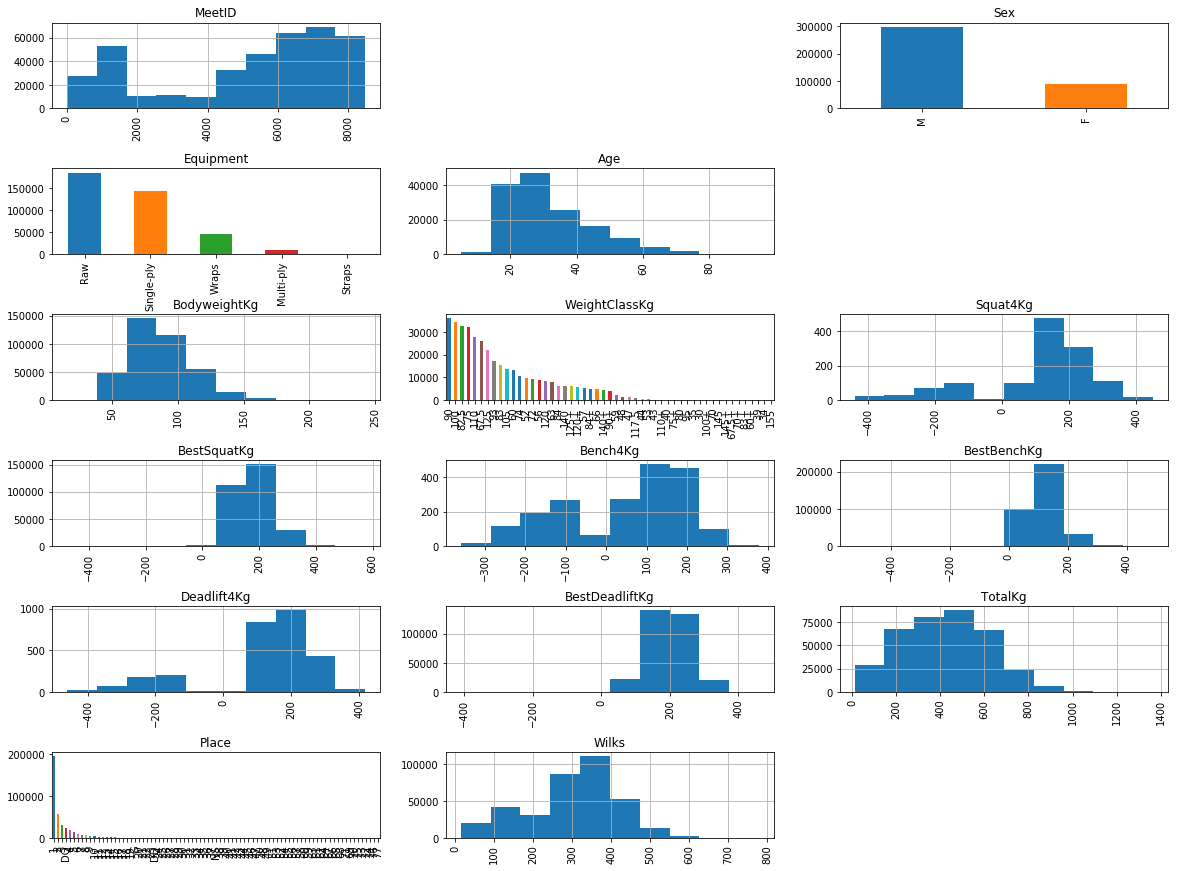

In [7]:
plot_data_distributions(df, cols_to_skip=['Name', 'Division'])

These plots shows us that:
- atleast 70% of the athletes in the dataset are males
- most athletes in the dataset choose to lift with little to no equipment (raw) or with Single-ply.
- most athletes in the dataset are between 20-40 years old
- most athletes weigh between 70-110kg
- most athletes' deadlift record (personal best lift) is around 100-300kg
- most athletes' benchpress record (personal best lift) is around 100-200kg
- most athletes' squats record (personal best lift) is around 180-250kg
- most athletes placed 1st in the respective competition
- most athletes' wilks coefficient is 300-400

## Pre-processing

### Check for NaN values

Do we have any NaN values in our dataset?

In [8]:
df.isnull().values.any()

True

Yes we do. Find out which columns contain NaN values.

In [9]:
def display_cols_with_NaN_values(df):
    print('Columns with NaN values:')
    for i, column in enumerate(df.columns):
        if df[[column]].isnull().values.any():
            print("- {}".format(column))

In [10]:
display_cols_with_NaN_values(df)

Columns with NaN values:
- Age
- Division
- BodyweightKg
- WeightClassKg
- Squat4Kg
- BestSquatKg
- Bench4Kg
- BestBenchKg
- Deadlift4Kg
- BestDeadliftKg
- TotalKg
- Place
- Wilks


### Replace NaN values

Replace Age NaN values with the mean value of all ages since there's a high probability that the athlete falls close to this age.

In [11]:
df[['Age']] = df[['Age']].fillna(value=df[['Age']].mean())

Replace Division and WeightClassKg NaN values with the category "Open" since they have not been categorized into any division / weightclass. We treat these data entries as an Open category where everyone can compete.

In [12]:
df[['Division', 'WeightClassKg']] = df[['Division', 'WeightClassKg']].fillna(value='Open')

Drop NaN values in BestSquatKg, BestBenchKg, and BestDeadliftKg since they will confuse our statistical model later on

In [13]:
lift_results_cols = [
    'BodyweightKg',
    'BestSquatKg',
    'BestBenchKg',
    'BestDeadliftKg'
]
df.dropna(subset=lift_results_cols, inplace=True)

Replace other numeric columns with 0 values

In [14]:
cols_to_replace = [
    'Squat4Kg',
    'Bench4Kg',
    'Deadlift4Kg',
    'TotalKg'
]
df[cols_to_replace] = df[cols_to_replace].fillna(value=0)

There is no good substitution value for the NaNs in the 'Place' column, and therefore we replace NaN's with "NPR" which stands for "No Placing Recorded". 

In [15]:
df[['Place']] = df[['Place']].fillna(value='NPR')

It makes sense to treat undefined Wilks coeficcients as 0

In [16]:
df[['Wilks']] = df[['Wilks']].fillna(value=0)

Double check to make sure we have replaced all NaN values

In [17]:
df.isnull().values.any()

False

In [18]:
df.shape

(287242, 17)

All NaN values have successfully been taken care of.

### Deal with non-numeric values in the "Place" column

In [19]:
df.Place.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'DQ', 'G',
       'NPR', '15', '13', '14', '12', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', 'DD',
       '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77'], dtype=object)

Notice that there are several non-numeric values in the Place column. If we Encode these directly into numbers, they might loose their semantic meaning.

How much data is marked as DQ (disqualified)?

In [20]:
def calc_percentage(x, y):
    """
    Returns the percentage of x in y
    """
    return x / y * 100

In [21]:
calc_percentage(df.loc[df['Place'] == 'DQ'].shape[0], df.shape[0])

0.5385702647941457

What about G, NS, NPR, DD?

In [22]:
calc_percentage(df.loc[df['Place'] == 'G'].shape[0], df.shape[0])

0.08842717986923918

In [23]:
calc_percentage(df.loc[df['Place'] == 'NS'].shape[0], df.shape[0])

0.0

In [24]:
calc_percentage(df.loc[df['Place'] == 'DD'].shape[0], df.shape[0])

0.034117573335375746

In [25]:
calc_percentage(df.loc[df['Place'] == 'NPR'].shape[0], df.shape[0])

0.2548373845050515

### Removal of data
We remove data from the dataset marked as G, NS, DD, and NPR in the "Place" column since there are no documentation online on what these abbreviations mean, and hence we might confuse the model and loose some semantic meaning in the results. The Overall percentage of data being removed is only slightly above 6%.

In [26]:
df = df[df['Place'] != 'G']
df = df[df['Place'] != 'NS']
df = df[df['Place'] != 'DD']
df = df[df['Place'] != 'NPR']

We also remove athletes / entries that have been disqualified. These results are not valid, and hence it does not make sense to train on these data entries.

In [27]:
df = df[df['Place'] != 'DQ']

Check to see if the data was successfully removed

In [28]:
calc_percentage(df.loc[df['Place'] == 'DQ'].shape[0], df.shape[0])

0.0

## Refactor the data type of the "Place" column

In [29]:
df.dtypes['Place'] == np.object

True

In [30]:
df['Place'] = pd.to_numeric(df['Place'])

In [31]:
df.dtypes['Place'] == np.object

False

In [32]:
df.dtypes['Place']

dtype('int64')

### Division Column

In [33]:
df.Division.unique().shape

(3244,)

We have 3244 distinct divisions in the dataset.

#### Distribution of the Division column

In [34]:
df.Division.value_counts()

Open                                62081
Boys                                51241
R-O                                 24162
R-JR                                 6981
Amateur Open                         6955
Junior                               6382
Junior 20-23                         5132
Open Men                             4460
Junior 19-23                         4316
O                                    3542
Juniors                              3529
Pro Open                             3528
Teen 14-18                           2986
Master 1                             2468
Master 40-49                         2249
R-T3                                 2080
Sub-Junior                           1816
R-C                                  1796
R-T2                                 1659
Master 2                             1486
M-O                                  1440
Master 40-44                         1419
Junior 18-19                         1405
Amateur Junior 20-23              

The take-away here is that most athlete results fall in the "Open" category.

### Name Column

In [35]:
df.Name.unique().shape

(112457,)

We have 112457 distinct names in the dataset.

#### Distribution of the Name column

In [36]:
df.Name.value_counts()

Sverre Paulsen               90
Jose Hernandez               86
Per Ove Sjøl                 70
Arnfinn Skadsem              62
Truls Kristensen             62
Tormod Andersen              60
Jan-Roger Johansen           60
Vidar Alexander Ringvold     60
Robert Øren                  59
Jan Edvard Jensen            59
Scott Layman                 57
Claude Dallaire              56
Jøran Langset                55
Jørn Kroken                  55
Thomas Puzicha               55
John MacDonald               55
Roald Kollåsen               53
Sigve Valentinsen            52
Ellen Stein                  52
Ron Strong                   51
Jerry Marentette             50
Rune Johansen                48
Åse Helen Madsen             47
Lars Edvin Samnøy            47
Geir Runar Korvald           47
Anthony Perez                46
Rolf A. Halvorsen            46
Jeff Becker                  45
Hans Øynes                   44
Jason Byrne                  44
                             ..
Drew Hof

The take-away here is that each entry is not necessarily a different athlete. Some athletes have recorded multiple results in different competitions / meets, possibly also in different weight classes and divisions (athletes can fluctuate in bodyweight through the course of their careers).

### Encode all strings to numerical values in the dataset
Using LabelEncoder, we can represent each string by a numeric value. This must be done because statistical models work with numbers and not strings.

In [37]:
# symbols such as > and < can't be label enconded, so we must replace them
df['Division'] = df['Division'].str.replace('>', 'gt')
df['Division'] = df['Division'].str.replace('<', 'lt')

In [38]:
def label_encode_cols(df):
    """
    Label-Encodes all columns in a dataframe
    except the columns defined in cols_to_skip.
    df: the dataframe to encode
    cols_to_skip: a list of column names that should not be label encoded.
    """
    print('Encoding the following columns:')
    for column in df.columns:
        if df.dtypes[column] == np.object:
            # The column is a string column. Encode it to numeric values.
            print("- {}".format(column))
            df[column] = LabelEncoder().fit_transform(df[column])

In [39]:
label_encode_cols(df)

Encoding the following columns:
- Name
- Sex
- Equipment
- Division
- WeightClassKg


### Make sure LabelEncoding succeeded
Plot the data distribution again

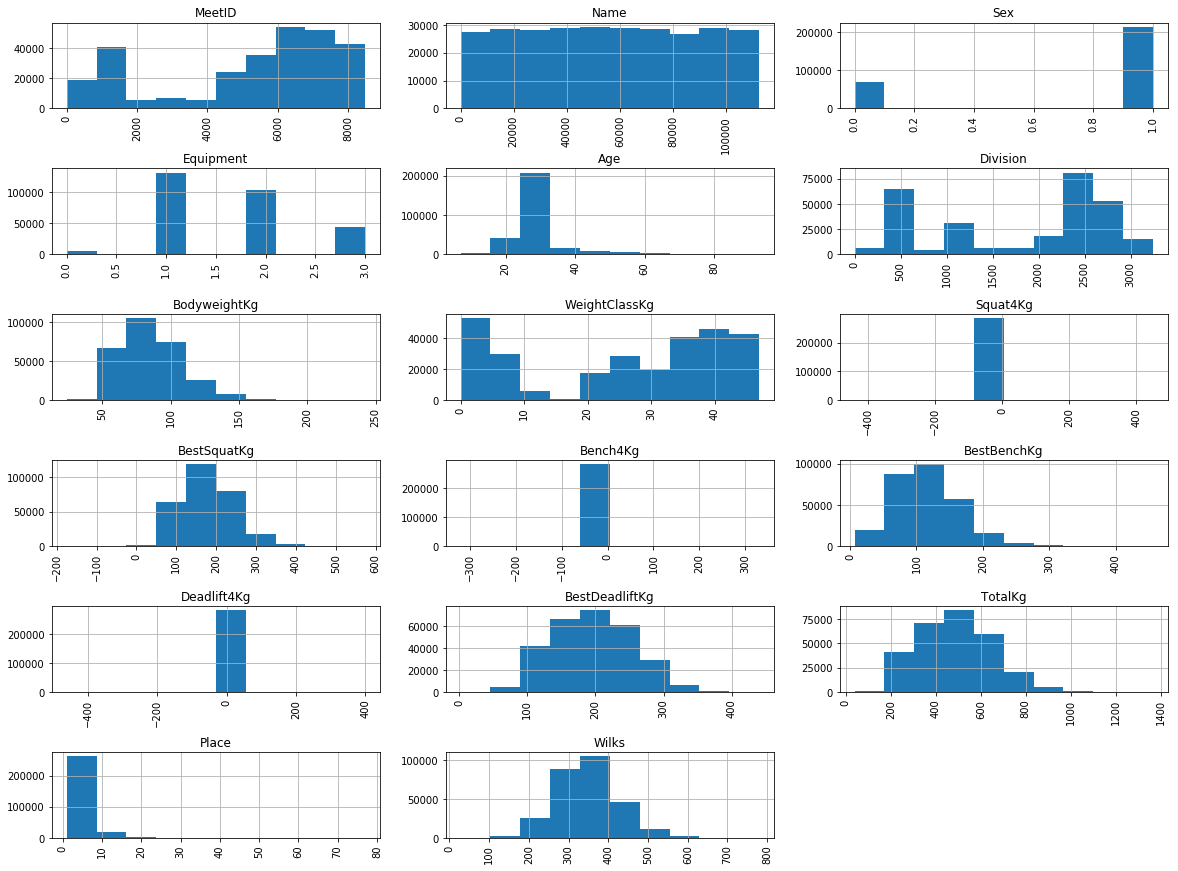

In [40]:
plot_data_distributions(df)

The LabelEncoding succeeded! All values in the dataset are now represented in numbers.

## Check for Outliers
Outliers can be a problem for any statistical model. Let's investigate our data and see if we are dealing with any major outliers.

Sources:
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

In [41]:
def plot_boxplots(df):
    """
    Plots boxplots of each column in a dataframe.
    df: the dataframe to plot.
    cols_to_skip: a list of column names to ignore.
    """
    fig = plt.figure(figsize=(20,15))
    num_cols = 3
    num_rows = math.ceil(float(df.shape[1]) / num_cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        ax.set_title(column)
        sns.boxplot(x=df[column], ax=ax)
    plt.subplots_adjust(hspace=0.7, wspace=0.2)

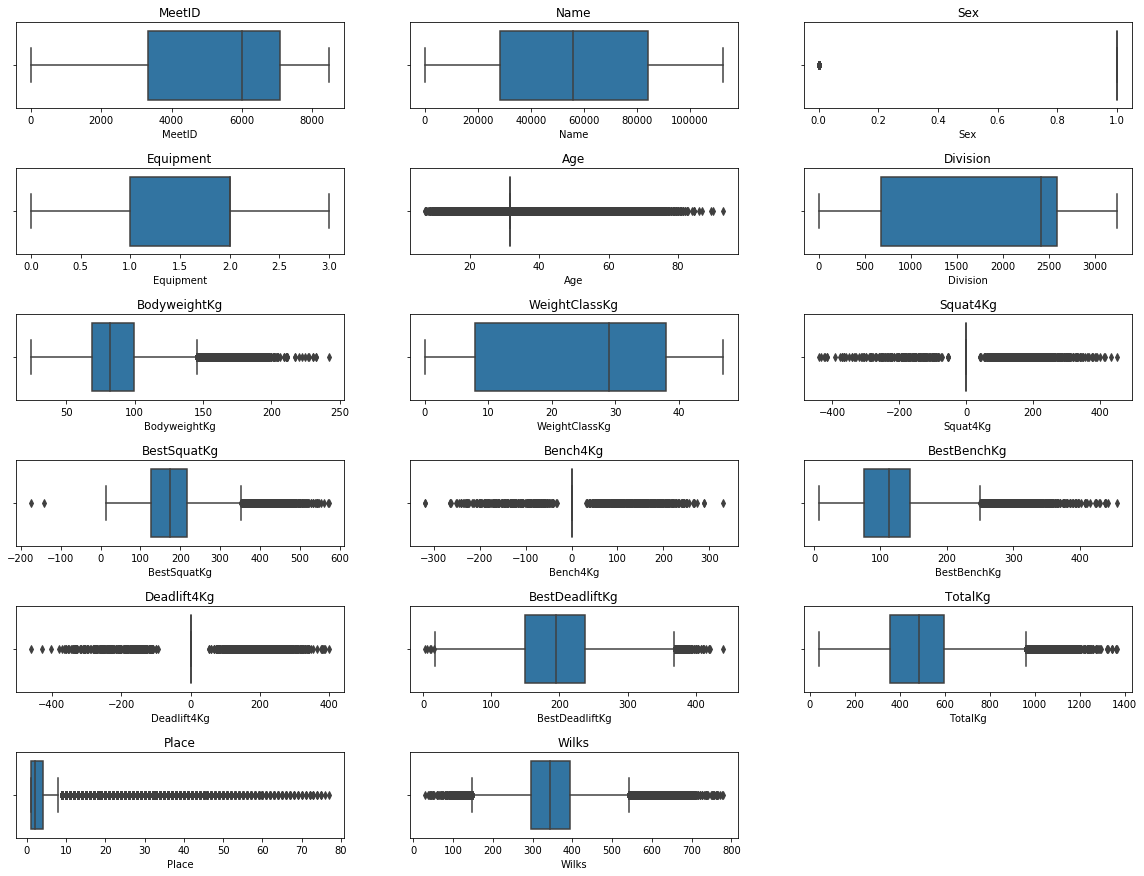

In [42]:
plot_boxplots(df)

### Outlier findings
- Lots of outliers in BodyWeightKg. For powerlifting, it makes sense that some athletes can weigh more than 150kg, so these values should not be removed. However, it does not make sense to have athletes weighing 0kg, so this is likely a data collection error. Hence, we should remove this data.
- BestSquatKg and BestBenchKg has similar issues with data collection as some outliers are negative values. It does not make sense for a person's personal best score in a lift to be a negative value. These values were likely collected wrong, and the negative sign might be a typo. We can't replace these values by taking the absolute values because this would affect the TotalKg score and the Wilks coefficient. Hence, we should remove these values.
- Wilks coefficients below zero are also outliers that don't make logical sense. We can't replace these values either so we should remove them as well.

### Remove data based on "Grand Truth" assumptions
I make the following assumptions about the data:
- Athletes cannot lift less than 0 kilograms in any of the exercises (bench press, deadlifts, and squats)
- Athletes cannot weigh below 25kg
- Athletes which lifts 200kg or more in bench press must also be able to lift at least 100kg in deadlifts (see Figure 2)
- Athletes which lifts 200kg or more in bench press must also be able to lift at least 100kg in squats (see Figure 3)
- Athletes which lifts 250kg or more in deadlifts should also be able to lift at least 85kg in bench press (see Figure 2)
- Athletes which lifts 250kg or more in squats should also be able to lift at least 85kg in bench press (see Figure 3)


### Visualize the relationships

In [43]:
def scatter_plot_relationship(df, col_x, col_y):
    """
    ScatterPlots the relationship between col_y and col_x
    """
    plt.scatter(
        x=df[col_x],
        y=df[col_y]
    )
    plt.title('{0} vs {1}'.format(col_y, col_x), fontsize=14)
    plt.xlabel(col_x, fontsize=14)
    plt.ylabel(col_y, fontsize=14)
    plt.grid(True)
    plt.show()

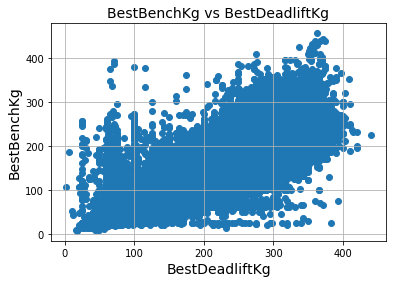

In [44]:
scatter_plot_relationship(df, 'BestDeadliftKg', 'BestBenchKg')

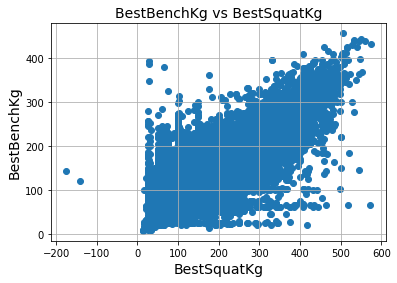

In [45]:
scatter_plot_relationship(df, 'BestSquatKg', 'BestBenchKg')

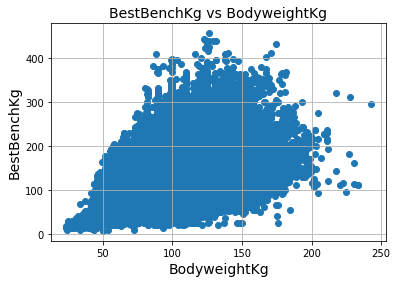

In [46]:
scatter_plot_relationship(df, 'BodyweightKg', 'BestBenchKg')

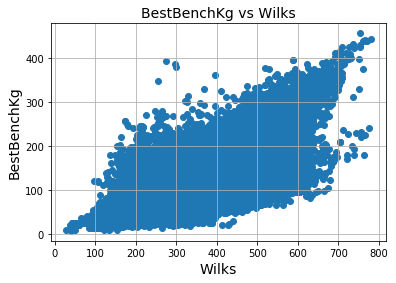

In [47]:
scatter_plot_relationship(df, 'Wilks', 'BestBenchKg')

### Check how many rows will get removed

In [48]:
df[df['BestSquatKg'] < 0].shape

(2, 17)

In [49]:
df[df['BestBenchKg'] < 0].shape

(0, 17)

In [50]:
df[df['BestDeadliftKg'] < 0].shape

(0, 17)

In [51]:
df[df['Wilks'] < 0].shape

(0, 17)

In [52]:
df[np.logical_and(df['BestBenchKg'] > 200, df['BestDeadliftKg'] < 100)].shape

(63, 17)

In [53]:
df[np.logical_and(df['BestBenchKg'] > 200, df['BestSquatKg'] < 100)].shape

(65, 17)

In [54]:
df[np.logical_and(df['BestDeadliftKg'] > 250, df['BestBenchKg'] < 85)].shape

(109, 17)

In [55]:
df[np.logical_and(df['BestSquatKg'] > 250, df['BestBenchKg'] < 85)].shape

(99, 17)

In [56]:
df[df['BodyweightKg'] < 25].shape

(5, 17)

In [57]:
# Remove powerlifting performances with negative results / values
df = df[df['BestSquatKg'] >= 0]
df = df[df['BestBenchKg'] >= 0]
df = df[df['Wilks'] >= 0]

# Remove powerlifters that weigh below 25kg
df = df[df['BodyweightKg'] >= 25]

# Remove powerlifters where BestBenchKg > 200kg and BestDeadliftKg < 100kg
df = df[np.logical_not(np.logical_and(df['BestBenchKg'] > 200, df['BestDeadliftKg'] < 100))]

# Remove powerlifters where BestBenchKg > 200kg and BestSquatKg < 100kg
df = df[np.logical_not(np.logical_and(df['BestBenchKg'] > 200, df['BestSquatKg'] < 100))]

# Remove powerlifters where BestDeadliftKg > 250kg and BestBenchKg < 85kg
df = df[np.logical_not(np.logical_and(df['BestDeadliftKg'] > 250, df['BestBenchKg'] < 85))]

# Remove powerlifters where BestSquatKg > 250kg and BestBenchKg < 85kg
df = df[np.logical_not(np.logical_and(df['BestSquatKg'] > 250, df['BestBenchKg'] < 85))]

### Export the processed data to a new CSV file

In [58]:
df.to_csv('powerlifting_processed.csv', index=False)

### Start using the processed CSV file from now and onwards
We do this to save time so we don't have to preprocess the data every time we run this kernel.

In [59]:
df = pd.read_csv('powerlifting_processed.csv')

In [60]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,7478,0,3,47.0,2384,59.60,26,0.0,47.63,0.0,20.41,0.0,70.31,138.35,1,155.05
1,0,29446,0,2,42.0,2383,58.51,26,0.0,142.88,0.0,95.25,0.0,163.29,401.42,1,456.38
2,0,29446,0,2,42.0,2451,58.51,26,0.0,142.88,0.0,95.25,0.0,163.29,401.42,1,456.38
3,0,24758,0,3,28.0,2451,62.41,29,-183.7,170.10,0.0,77.11,0.0,145.15,392.36,1,424.40
4,0,75728,0,1,60.0,2387,67.31,29,0.0,124.74,0.0,95.25,0.0,163.29,383.28,1,391.98


### Calculate Descriptive Statistics

In [211]:
df.describe()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
count,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000,284357.000000
mean,5187.280767,56211.270878,0.757017,1.655518,30.992174,1818.244917,85.486772,25.154978,0.452967,177.427408,0.145835,114.552779,0.789984,195.453397,487.433043,3.201697,347.856896
std,2510.176801,32318.705421,0.428886,0.754016,7.239705,942.284402,22.566122,15.520236,12.634263,65.343106,8.004555,47.714031,16.437372,58.141732,164.744103,4.150887,77.303556
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,25.200000,0.000000,-440.500000,13.600000,-320.000000,6.800000,-461.000000,2.270000,38.600000,1.000000,28.230000
25%,3320.000000,28436.000000,1.000000,1.000000,31.500000,678.000000,68.500000,8.000000,0.000000,127.500000,0.000000,76.000000,0.000000,149.690000,356.070000,1.000000,295.610000
50%,6017.000000,55987.000000,1.000000,2.000000,31.668237,2410.000000,82.200000,29.000000,0.000000,174.630000,0.000000,112.500000,0.000000,195.000000,485.000000,2.000000,344.270000
75%,7072.000000,84257.000000,1.000000,2.000000,31.668237,2590.000000,99.160000,38.000000,0.000000,217.720000,0.000000,145.000000,0.000000,237.500000,597.500000,4.000000,394.610000
max,8481.000000,112456.000000,1.000000,3.000000,93.000000,3243.000000,242.400000,47.000000,450.000000,573.790000,330.000000,455.860000,400.000000,440.000000,1365.310000,77.000000,779.380000


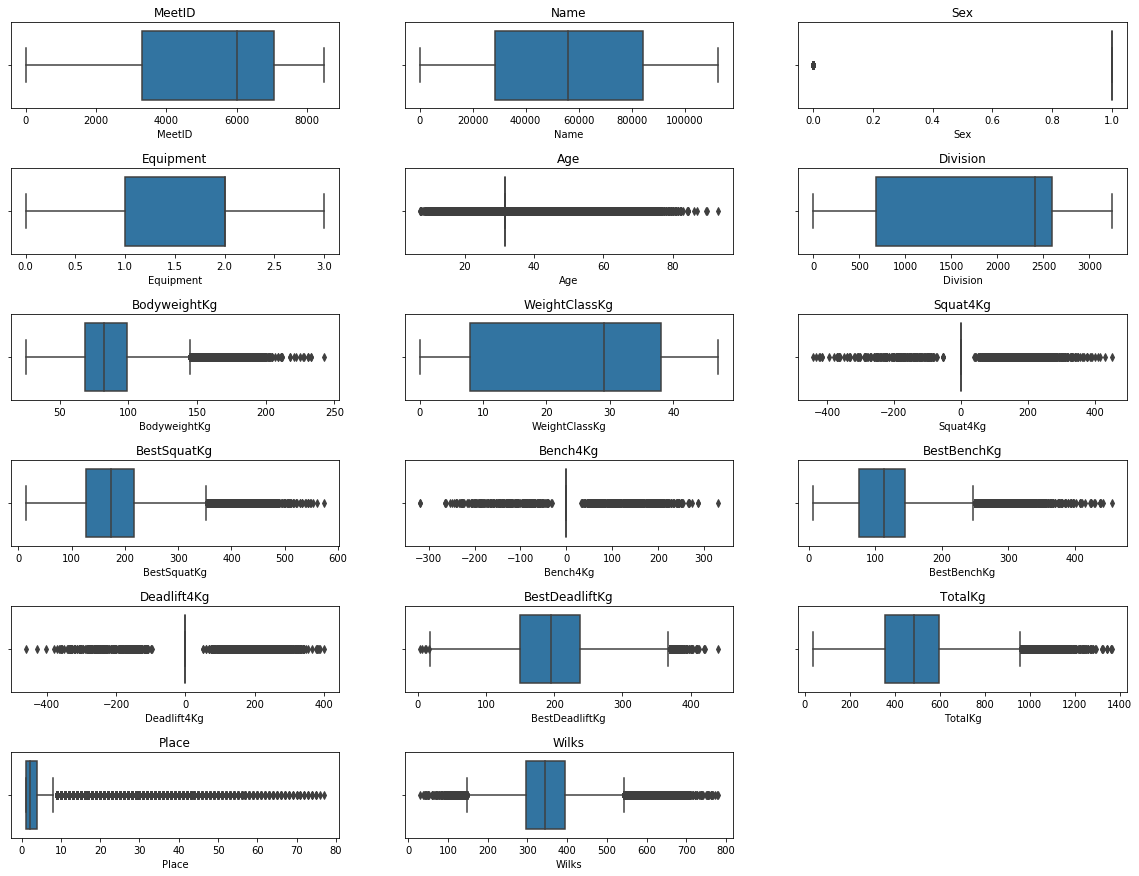

In [62]:
plot_boxplots(df)

### Plot Data Distributions

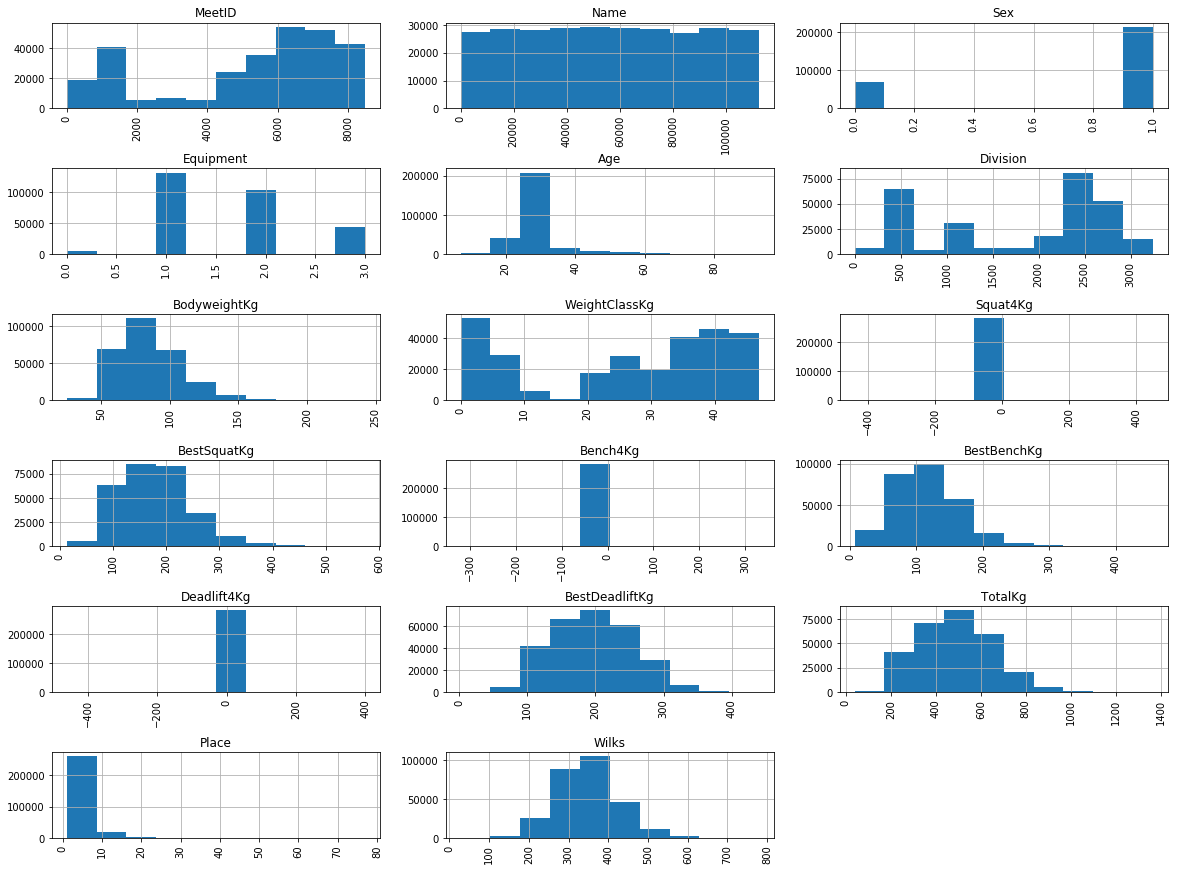

In [63]:
plot_data_distributions(df)

### Plot Data Correlation

In [64]:
corr = df.corr()
corr

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
MeetID,1.000000,-0.040226,0.011105,-0.092582,-0.078028,-0.023148,-0.003181,-0.012286,0.011629,-0.058256,0.020180,-0.068645,0.021172,-0.057011,-0.063110,0.082948,-0.094690
Name,-0.040226,1.000000,-0.010844,-0.006711,0.029766,0.034030,0.003915,-0.003930,0.001122,0.005403,-0.001129,0.014643,-0.005243,0.007863,0.009159,-0.019359,0.016644
Sex,0.011105,-0.010844,1.000000,0.127335,-0.010818,-0.171569,0.412079,-0.220081,-0.005981,0.550666,0.005106,0.592828,-0.013709,0.592487,0.599211,0.094523,0.174798
Equipment,-0.092582,-0.006711,0.127335,1.000000,0.051035,-0.274626,0.085709,-0.110162,0.012389,0.121445,-0.007069,0.074174,0.009223,0.067231,0.093378,-0.018747,0.045983
Age,-0.078028,0.029766,-0.010818,0.051035,1.000000,0.000211,0.065422,-0.039962,0.011829,-0.024376,0.009892,0.017290,0.008665,-0.034105,-0.016697,-0.043245,-0.061643
Division,-0.023148,0.034030,-0.171569,-0.274626,0.000211,1.000000,0.005045,0.057878,-0.001041,0.021923,-0.000941,0.082197,-0.003086,0.113416,0.072529,-0.137828,0.151960
BodyweightKg,-0.003181,0.003915,0.412079,0.085709,0.065422,0.005045,1.000000,-0.469335,0.004298,0.633010,0.007658,0.638932,-0.007908,0.601276,0.648326,-0.030746,0.184108
WeightClassKg,-0.012286,-0.003930,-0.220081,-0.110162,-0.039962,0.057878,-0.469335,1.000000,-0.002767,-0.323438,-0.007174,-0.328736,0.001571,-0.276324,-0.321017,0.057281,-0.114688
Squat4Kg,0.011629,0.001122,-0.005981,0.012389,0.011829,-0.001041,0.004298,-0.002767,1.000000,0.005991,0.045760,0.005754,0.120972,0.007450,0.006672,-0.018804,0.012481
BestSquatKg,-0.058256,0.005403,0.550666,0.121445,-0.024376,0.021923,0.633010,-0.323438,0.005991,1.000000,0.005432,0.899871,-0.012184,0.895106,0.973160,-0.068427,0.785874


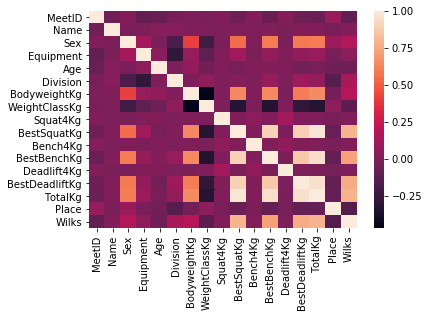

In [65]:
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

### Strong Correlations
- TotalKg & BestSquatKg
- TotalKg & BestDeadliftKg
- TotalKg & BestBenchKg
- Wilks & BestSquatKg
- Wilks & BestBenchKg
- Wilks & BestDeadliftKg
- Wilks & TotalKg
- BestDeadliftKg & BestSquatKg
- BestDeadliftKg & BestBenchKg
- BestBenchKg & BestSquatKg

#### This makes sense because:
- TotalKg = BestSquatKg + BestDeadliftKg + BestBenchKg
- Wilks is a coefficient based on BestSquatKg, BestDeadliftKg, BestBenchKg as well as other athlete properties such as Age and Sex.
- Deadlifts and Squats are both exercises where the legs and core of an athlete are heavily involved.

### Weak Correlations
- WeightClassKg & BodyweightKg
- WeightClassKg & BestSquatKg
- WeightClassKg & BestBenchKg
- WeightClassKg & BestDeadliftKg
- WeightClassKg & TotalKg

#### Explanation:
- It looks like the encoding of WeightClassKg didn't go very well. The values were likely not sorted in the right order before the LabelEncoding, and now WeightClassKg has lost some semantic value. However, this is fine because BodyweightKg is a better indicator for the same type of data anyways (both columns aim to describe more or less the same idea).

# Hypothesis
### Does BestDeadliftKg and BestSquatKg have a positive or negative effect on BestBenchKg?
Are athletes that are stronger in Benchpress also stronger in Deadlifts and Squats? Does the extra upper-body strength gained from Benchpress impact lower-body strength exercises such as Deadlifts and Squats?

# Model Selection
In order to know what model to select, we have to know what types of variables we choose in our training data and target data. 

### Variable Types
- Categorical (nominal): mutual exclusive, but not ordered, categories
- Dichotomous: a categorical variable which only has two categories (e.g. "yes" and "no")
- Ordinal: The order matters, but not the difference between values
- Interval: A measurement where the difference between 2 values is meaningful

### Independent vs Dependent Variables
- Independent: Training data, e.g. the variables in X used to predict the target data y.
- Dependent: Target data, the variables in y which depends on X.

## Define Features and Target Data
### X (independent)
- BestDeadliftKg is an ordinal variable
- BestSquatKg is an ordinal variable

### y (dependent)
- BestBenchKg is an ordinal variable

### Visualize relationships

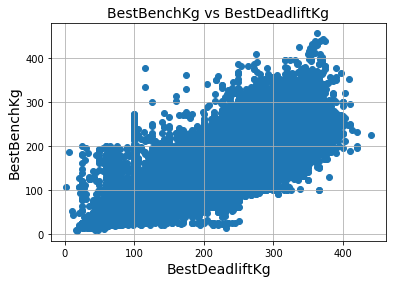

In [66]:
scatter_plot_relationship(df, 'BestDeadliftKg', 'BestBenchKg')

When BestBenchKg increases, BestDeadliftKg also increases for most cases

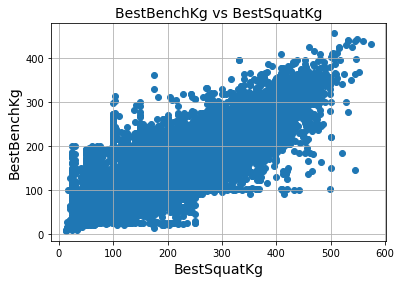

In [67]:
scatter_plot_relationship(df, 'BestSquatKg', 'BestBenchKg')

When BestBenchKg increases, BestSquatKg also increases for most cases

### Quickly try the StatsModels package for OLS Regression

In [68]:
# Specify the model
model = smf.ols(
    formula='BestBenchKg ~ BestDeadliftKg + BestSquatKg',
    data=df
)

# Fit the model
results = model.fit()

# Display results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            BestBenchKg   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 6.835e+05
Date:                Mon, 23 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:16:34   Log-Likelihood:            -1.2525e+06
No. Observations:              284357   AIC:                         2.505e+06
Df Residuals:                  284354   BIC:                         2.505e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -15.4186      0.133   -116.366      0.000     -15.678     -15.159
BestDeadliftKg     0.2472      0.001    172.609      0.000       0.244       0.250
BestSquatKg        0.4602      0.001    361.076      0.000       0.458       0.463
==============================================================================
Omnibus:                    83252.414   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           604751.353
Skew:                           1.217   Prob(JB):                         0.00
Kurtosis:                       9.717   Cond. No.                         989.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS Regression is the WRONG model!
This is because we have 2 ordinal variables in X, and 1 ordinal variable in y. If we wanted to use regression for this problem, we'd have to use <b>Ordinal Regression</b>.

# Research suggests MLPRegressor for Ordinal Regression
Source: https://arxiv.org/pdf/0704.1028.pdf

### Train a Multilayer Perceptron Regressor

In [70]:
# Define X and y
X = df[['BestDeadliftKg', 'BestSquatKg']]
y = df['BestBenchKg']

# Split into training/test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Standardize training data to converge faster
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)

# Standardize test data the same way as training data
X_test = scaler.transform(X_test)

### Gridsearch for the best hyperparameters
Note: The gridsearches take a very long time to run!

In [77]:
grid_search_1_hidden_layer = GridSearchCV(
    estimator=MLPRegressor(max_iter=200),
    param_grid={
        'hidden_layer_sizes': [
            (50,),
            (100,)
        ],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    verbose=True
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search_1_hidden_layer.best_params_))
print('Best score: {}'.format(grid_search_1_hidden_layer.best_score_))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/mons/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Best hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001}
Best score: 0.8370218090635324


In [78]:
grid_search_2_hidden_layers = GridSearchCV(
    estimator=MLPRegressor(max_iter=200),
    param_grid={
        'hidden_layer_sizes': [
            (50, 50),
            (100, 100),
        ],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    verbose=True
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search_2_hidden_layers.best_params_))
print('Best score: {}'.format(grid_search_2_hidden_layers.best_score_))      

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 59.5min finished


Best hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.0001}
Best score: 0.8371272018513667


In [76]:
grid_search_3_hidden_layers = GridSearchCV(
    estimator=MLPRegressor(max_iter=200),
    param_grid={
        'hidden_layer_sizes': [
            (50, 100, 50),
            (100, 150, 100)
        ],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    verbose=True
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search_3_hidden_layers.best_params_))
print('Best score: {}'.format(grid_search_3_hidden_layers.best_score_)) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 56.1min finished


Best hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 100), 'learning_rate_init': 0.0001}
Best score: 0.8371495707012008


In [75]:
grid_search = GridSearchCV(
    estimator=MLPRegressor(max_iter=200),
    param_grid={
        'hidden_layer_sizes': [
            (100,)
            (100, 100),
            (100, 150, 100),
            (50, 100, 150, 100, 50)
        ],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    verbose=True,
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_)) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 20.6min finished


Best hyperparameters: {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 150, 100, 50), 'learning_rate_init': 0.0001}
Best score: 0.8369524628168251


##### GridSearch Results
The best hyperparameters are:
- Alpha: 0.0001
- Learning Rate: 0.0001
- Hidden Layer Sizes: (100, 150, 100)

Note: Use these values in the MLPRegressor training below if you want to skip the GridSearching

### Train the model with the best hyperparameters

In [71]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 150, 100),
    alpha=0.0001,
    learning_rate_init=0.0001,
    max_iter=1000
).fit(X_train, y_train)

### Calculate Scores on the Train Set

In [72]:
y_pred = mlp.predict(X_train)
mlp_score = mlp.score(X_train, y_train)
print('MLP Prediction: {}'.format(y_pred))
print('MLP Score (R^2): {}'.format(mlp_score))

MLP Prediction: [128.59725474 144.06329096  59.99369229 ... 184.44929475  55.76914286
 106.11562276]
MLP Score (R^2): 0.8368727216199776


### Calculate Scores on the Test Set

In [73]:
y_pred = mlp.predict(X_test)
mlp_score = mlp.score(X_test, y_test)

In [74]:
print('MLP Prediction: {}'.format(y_pred))
print('MLP Score (R^2): {}'.format(mlp_score))

MLP Prediction: [101.45440913 107.7339814  119.97927432 ... 158.12077008 113.80728785
 120.42244193]
MLP Score (R^2): 0.8406109124846245


## Understanding the Score
The coefficient of determination R^2 of the prediction:
- The best possible score is 1.0
- The score can be negative (the model can be arbitrarily worse)
- A constant model that always predicts E(y), disregarding the inputs, would get a score of 0.0

### Cross Validation
Perform 10-fold Cross Validation on the model

In [120]:
x_val_scores_dl_sq = cross_val_score(
    estimator=MLPRegressor(
        hidden_layer_sizes=(100, 150, 100),
        alpha=0.0001,
        learning_rate_init=0.0001,
        max_iter=1000
    ),
    X=df[['BestSquatKg', 'BestDeadliftKg']],
    y=df['BestBenchKg'],
    cv=10,
    verbose=2
)

print("10-fold Cross Validation Scores:")
print(x_val_scores_dl_sq)
print('Mean Score:')
print(x_val_scores_dl_sq.mean())

[CV]  ................................................................
[CV] ................................................. , total= 2.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] ................................................. , total=  49.7s
[CV]  ................................................................
[CV] ................................................. , total= 2.0min
[CV]  ................................................................
[CV] ................................................. , total= 2.9min
[CV]  ................................................................
[CV] ................................................. , total= 3.6min
[CV]  ................................................................
[CV] ................................................. , total= 2.4min
[CV]  ................................................................
[CV] ................................................. , total= 3.0min
[CV]  ................................................................
[CV] ................................................. , total= 1.6min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.4min finished


In [209]:
print('Median Score:')
print(np.median(x_val_scores_dl_sq))

Median Score:
0.8436423798427594


### Improving the Score
To improve the score we can do the following things:
- Add more rows to the dataset - not possible here. More than 200k rows of data should also be good enough. 
- Increase the number of iterations - Our model is converging, so more iterations likely won't help at all.
- Increase the number of features - this is possible, so we perform feature selection!


### Visualize Relationships between BestBenchKg and all other features

#### Features that I think will likely have a positive effect on BestBenchKg
- Sex
- Equipment
- Age
- BodyweightKg
- WeightClassKg
- Place

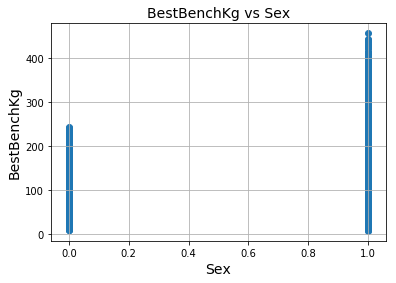

In [75]:
scatter_plot_relationship(df, 'Sex', 'BestBenchKg')

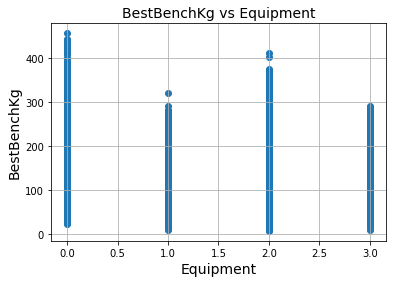

In [76]:
scatter_plot_relationship(df, 'Equipment', 'BestBenchKg')

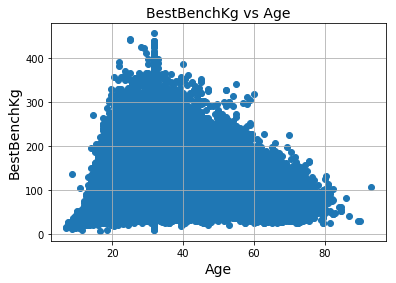

In [77]:
scatter_plot_relationship(df, 'Age', 'BestBenchKg')

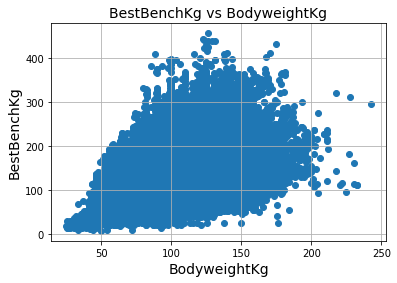

In [78]:
scatter_plot_relationship(df, 'BodyweightKg', 'BestBenchKg')

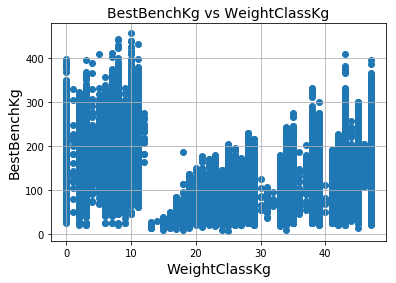

In [79]:
scatter_plot_relationship(df, 'WeightClassKg', 'BestBenchKg')

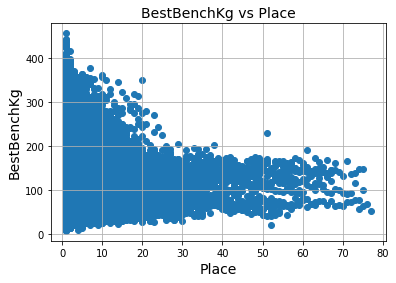

In [80]:
scatter_plot_relationship(df, 'Place', 'BestBenchKg')

#### Features that I think likely won't have much of an effect on BestBenchKg
- MeetID
- Name
- Division
- Squat4Kg
- Deadlift4Kg
- Bench4Kg

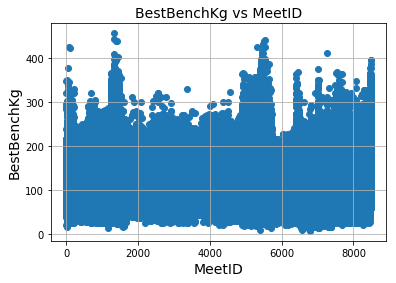

In [81]:
scatter_plot_relationship(df, 'MeetID', 'BestBenchKg')

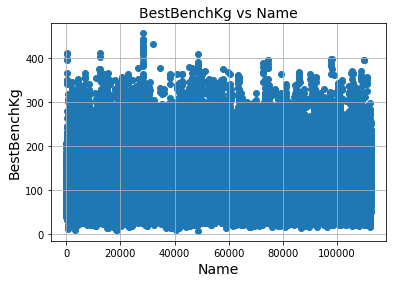

In [82]:
scatter_plot_relationship(df, 'Name', 'BestBenchKg')

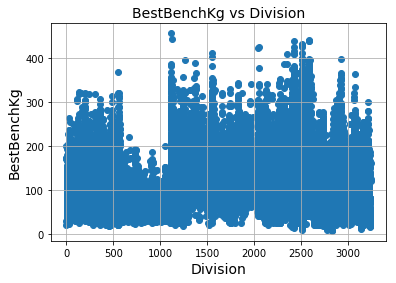

In [83]:
scatter_plot_relationship(df, 'Division', 'BestBenchKg')

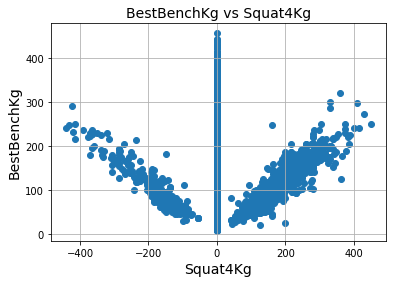

In [84]:
scatter_plot_relationship(df, 'Squat4Kg', 'BestBenchKg')

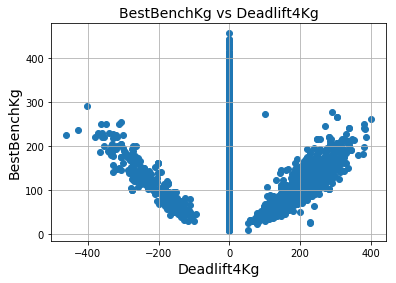

In [85]:
scatter_plot_relationship(df, 'Deadlift4Kg', 'BestBenchKg')

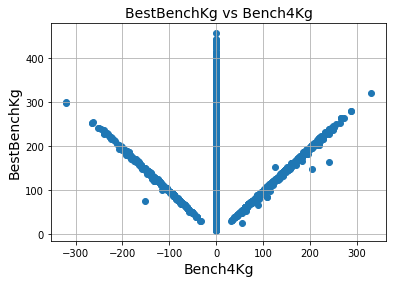

In [86]:
scatter_plot_relationship(df, 'Bench4Kg', 'BestBenchKg')

#### Features that I consider "cheating" when predicting BestBenchKg
- TotalKg: This is the sum of bench + squat + deadlift, so it would just be predicting a number in this equation
- Wilks: The Wilks coefficient is calculated from benchpress results, squat results, and deadlift results, as well as other factors such as gender, age, and weight. It would again just be predicting a number used in this equation.

It is very likely that we will not have access to these features in a production environment. This is because both of these features depends on prior knowledge of BestBenchKg.

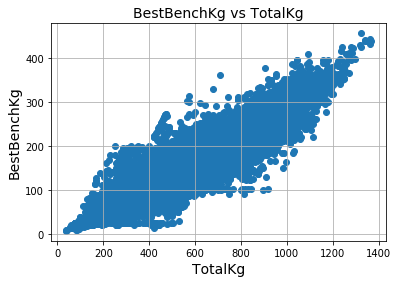

In [87]:
scatter_plot_relationship(df, 'TotalKg', 'BestBenchKg')

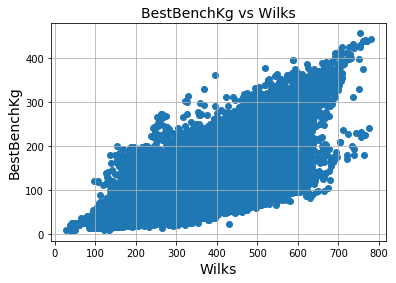

In [88]:
scatter_plot_relationship(df, 'Wilks', 'BestBenchKg')

# Perform Feature Selection
We are not satisfied with the 81.9% score. Therefore, we will find other features in the dataset which will help the model to predict better results. The goal is to find the features that lead to the best results.

In [99]:
# excluded features are Wilks and TotalKg
features = [
    'Sex',
    'Equipment',
    'Age',
    'BodyweightKg',
    'WeightClassKg',
    'Place',
    'Division',
    'Name',
    'MeetID',
    'Squat4Kg',
    'Deadlift4Kg',
    'Bench4Kg',
]

In [ ]:
scores = [
    { 'Deadlift&Squat': mlp_score }
]

In [ ]:
best_scores = [
    { 'Deadlift&Squat': mlp_score }
]

In [100]:
# Initialize columns to include in X and y
X_cols = ['BestDeadliftKg', 'BestSquatKg']
y = df['BestBenchKg']

# Perform feature selection across all features
for i in range(len(features)):
    if len(scores) == len(best_scores):
        # Add a new scores map only if we have no cached results
        scores.append({})
    
    # Compute scores for each feature
    for feature in features:
        # Check if the scores for this feature have already been computed
        if feature in scores[-1]:
            print('Using cached feature: {}'.format(feature))
            continue
        
        # Add the feature to X_cols
        X_cols.append(feature)
        
        # Define and standardize X (standardized data converges faster)
        X = RobustScaler().fit_transform(df[X_cols])

        # Define the model
        mlp = MLPRegressor(
            hidden_layer_sizes=(100, 150, 100),
            alpha=0.0001,
            learning_rate_init=0.0001,
            max_iter=200
        )

        # compute 5-fold cross validation scores
        x_val_scores = cross_val_score(
            estimator=mlp,
            X=X,
            y=y,
            cv=5
        )

        # Store the cross validation scores
        scores[-1][feature] = x_val_scores
        
        # remove the feature from X_cols
        X_cols.pop()
    
    # find the best feature to add to X
    col_with_best_score = max(
        scores[-1],
        key=(lambda key: scores[-1][key].mean())
    )
    
    # Remove the best feature from the list
    features.remove(col_with_best_score)
    
    # Keep track of the best scores
    best_scores.append({
        col_with_best_score: scores[-1][col_with_best_score]
    })
    
    # Add the best score to X_cols
    X_cols.append(col_with_best_score)
    
    print('Iteration: {}'.format(i+1))
    print('Best Feature: {}'.format(col_with_best_score))
    print('5-fold Scores: {}'.format(scores[-1][col_with_best_score]))
    print('5-fold Mean Score: {}\n'.format(scores[-1][col_with_best_score].mean()))

print('\nResults:')
print(best_scores)

Using cached feature: Sex
Using cached feature: Equipment
Using cached feature: Age
Using cached feature: BodyweightKg
Using cached feature: WeightClassKg
Using cached feature: Place
Using cached feature: Division
Using cached feature: Name
Using cached feature: MeetID
Iteration: 1
Best Feature: Division
5-fold Scores: [0.85263109 0.79964968 0.79019363 0.85625348 0.85466036]
5-fold Mean Score: 0.8306776489738332

Iteration: 2
Best Feature: WeightClassKg
5-fold Scores: [0.85824382 0.81705721 0.78738883 0.86160276 0.86414311]
5-fold Mean Score: 0.8376871430745119

Iteration: 3
Best Feature: Equipment
5-fold Scores: [0.8666262  0.82668195 0.80689119 0.86488232 0.8655261 ]
5-fold Mean Score: 0.8461215527669708

Iteration: 4
Best Feature: Sex
5-fold Scores: [0.87246701 0.8374175  0.76951072 0.87355699 0.87449633]
5-fold Mean Score: 0.8454897081058125

Iteration: 5
Best Feature: Place
5-fold Scores: [0.87201268 0.83726391 0.80043693 0.86962687 0.87669557]
5-fold Mean Score: 0.851207193201068

In [121]:
best_scores[0]['Deadlift&Squat'] = x_val_scores_dl_sq

In [124]:
scores[0]['Deadlift&Squat'] = x_val_scores_dl_sq

In [125]:
def print_feature_selection_results(scores, best_scores):
    print('Results per iteration:')
    for i in range(len(scores)):
        print('Iteration: {}'.format(i))
        for key in scores[i]:
            print('\t{0}: {1}'.format(key, scores[i][key]))
        print('')
        print('Best Feature:')
        for key in best_scores[i]:
            print('\t{0}: {1}'.format(key, best_scores[i][key]))
        print('')

In [126]:
print_feature_selection_results(scores, best_scores)

Results per iteration:
Iteration: 0
	Deadlift&Squat: [0.83092388 0.85676542 0.70393038 0.86421837 0.82155298 0.72959068
 0.85372669 0.85191708 0.83536768 0.86615936]

Best Feature:
	Deadlift&Squat: [0.83092388 0.85676542 0.70393038 0.86421837 0.82155298 0.72959068
 0.85372669 0.85191708 0.83536768 0.86615936]

Iteration: 1
	Sex: [0.85690425 0.81257046 0.70701547 0.86551322 0.85774793]
	Equipment: [0.85066136 0.80464627 0.7639933  0.85584816 0.85309569]
	Age: [0.84931972 0.79518388 0.76422533 0.84905449 0.85303219]
	BodyweightKg: [0.85401832 0.81392053 0.75748851 0.85974693 0.85917832]
	WeightClassKg: [0.85541727 0.81290969 0.72036187 0.85959353 0.86021155]
	Place: [0.85091937 0.80138127 0.77098015 0.85414551 0.85189763]
	Division: [0.85263109 0.79964968 0.79019363 0.85625348 0.85466036]
	Name: [0.85014261 0.80207449 0.76139269 0.85405192 0.85019464]
	MeetID: [0.82735321 0.79865446 0.78755339 0.77644385 0.84762539]
	Squat4Kg: [0.84672947 0.80209351 0.76895775 0.85373129 0.85003577]
	Dea

## Plot the Results

In [147]:
# Get a list of all keys in order
all_keys = []
for i in range(len(best_scores)):
    for key in best_scores[i]:
        all_keys.append(key)

# construct a dataframe for all scores
df_scores = pd.DataFrame(columns=all_keys)
df_scores['Deadlift&Squat'] = pd.Series(best_scores[0]['Deadlift&Squat'])
df_scores['Division'] = pd.Series(best_scores[1]['Division'])
df_scores['WeightClassKg'] = pd.Series(best_scores[2]['WeightClassKg'])
df_scores['Equipment'] = pd.Series(best_scores[3]['Equipment'])
df_scores['Sex'] = pd.Series(best_scores[4]['Sex'])
df_scores['Place'] = pd.Series(best_scores[5]['Place'])
df_scores['BodyweightKg'] = pd.Series(best_scores[6]['BodyweightKg'])
df_scores['Bench4Kg'] = pd.Series(best_scores[7]['Bench4Kg'])
df_scores['Name'] = pd.Series(best_scores[8]['Name'])
df_scores['Deadlift4Kg'] = pd.Series(best_scores[9]['Deadlift4Kg'])
df_scores['Squat4Kg'] = pd.Series(best_scores[10]['Squat4Kg'])
df_scores['Age'] = pd.Series(best_scores[11]['Age'])
df_scores['MeetID'] = pd.Series(best_scores[12]['MeetID'])
df_scores.head(10)

,Deadlift&Squat,Division,WeightClassKg,Equipment,Sex,Place,BodyweightKg,Bench4Kg,Name,Deadlift4Kg,Squat4Kg,Age,MeetID
0,0.830924,0.852631,0.858244,0.866626,0.872467,0.872013,0.871639,0.873864,0.873928,0.871209,0.870296,0.869124,0.850039
1,0.856765,0.799650,0.817057,0.826682,0.837417,0.837264,0.842398,0.841818,0.841189,0.838462,0.837607,0.838399,0.831343
2,0.703930,0.790194,0.787389,0.806891,0.769511,0.800437,0.802668,0.794742,0.783827,0.802815,0.785510,0.747517,0.748822
3,0.864218,0.856253,0.861603,0.864882,0.873557,0.869627,0.873527,0.871776,0.873344,0.872179,0.872081,0.868976,0.866742
4,0.821553,0.854660,0.864143,0.865526,0.874496,0.876696,0.877587,0.879779,0.876620,0.876856,0.877544,0.872971,0.874424
5,0.729591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.853727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.851917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.835368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.866159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
def plot_feature_selection_boxplots(df_scores):
    sns.boxplot(data=df_scores)
    plt.ylim(0.78, 0.9)
    plt.plot(df_scores.median(), linewidth=5, markersize=12, label='Median R^2 Score')
    plt.xticks(rotation="vertical")
    plt.title('Feature Selection 5-fold R^2 Scores', fontsize=14)
    plt.xlabel('Features sequentially added to X', fontsize=14)
    plt.ylabel('R^2 Score', fontsize=14)
    plt.legend()

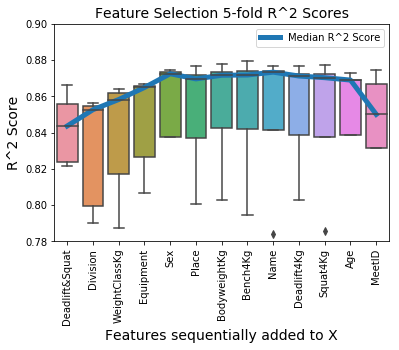

In [196]:
plot_feature_selection_boxplots(df_scores)

In [190]:
df_scores.median()

Deadlift&Squat    0.843642
Division          0.852631
WeightClassKg     0.858244
Equipment         0.864882
Sex               0.872467
Place             0.869627
BodyweightKg      0.871639
Bench4Kg          0.871776
Name              0.873344
Deadlift4Kg       0.871209
Squat4Kg          0.870296
Age               0.868976
MeetID            0.850039
dtype: float64

## 10-Fold Cross Validation on the best features

In [197]:
x_val_scores_best_features = cross_val_score(
    estimator=MLPRegressor(
        hidden_layer_sizes=(100, 150, 100),
        alpha=0.0001,
        learning_rate_init=0.0001,
        max_iter=1000
    ),
    X=df[['BestSquatKg',
          'BestDeadliftKg',
          'WeightClassKg',
          'Equipment',
          'Sex',
          'Place',
          'BodyweightKg',
          'Bench4Kg',
          'Name']],
    y=df['BestBenchKg'],
    cv=10,
    verbose=2
)

print("10-fold Cross Validation Scores:")
print(x_val_scores_best_features)
print('Mean Score:')
print(x_val_scores_best_features.mean())

[CV]  ................................................................
[CV] ................................................. , total=  33.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.0s remaining:    0.0s


[CV] ................................................. , total=  22.9s
[CV]  ................................................................
[CV] ................................................. , total=  20.4s
[CV]  ................................................................
[CV] ................................................. , total=  38.4s
[CV]  ................................................................
[CV] ................................................. , total=  41.2s
[CV]  ................................................................
[CV] ................................................. , total=  19.0s
[CV]  ................................................................
[CV] ................................................. , total=  17.9s
[CV]  ................................................................
[CV] ................................................. , total=  18.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.1min finished


In [198]:
print('Median Score:')
print(np.median(x_val_scores_best_features))

Median Score:
0.8149227054057311


Text(0,0.5,'R^2 Score')

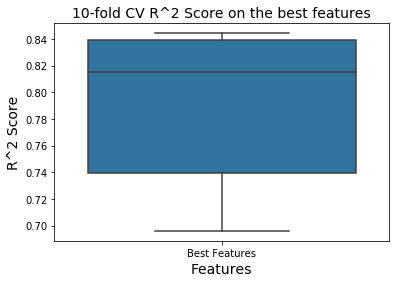

In [210]:
sns.boxplot(
    data=pd.DataFrame(
        x_val_scores_best_features, 
        columns=['Best Features']
    )
)
plt.title('10-fold CV R^2 Score on the best features', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)

# Conclusion
I am able to predict benchpress results with a median R^2 coefficient / score of 0.8733 at best. The best model specs to predict bench press results are:
```
X = [
    BestDeadliftKg,
    BestSquatKg,
    WeightClassKg,
    Equipment,
    Sex,
    Place,
    BodyweightKg,
    Bench4Kg,
    Name
]

y = [
    BestBenchKg
]

X = RobustScaler().fit_transform(X)

mlp = MLPRegressor(
    hidden_layer_sizes=(100, 150, 100),
    alpha=0.0001,
    learning_rate_init=0.0001,
    max_iter=200
).fit(X, y)
```

# Future Work
## What happens if we add TotalKg and Wilks?
At first I classified Wilks and TotalKg to be "cheating" since they are dependent on the target. Let's see what happens if we add them to our best features in X.

## Run 10-fold Cross Validation with TotalKg and Wilks in X

In [192]:
x_val_scores_all = cross_val_score(
    estimator=MLPRegressor(
        hidden_layer_sizes=(100, 150, 100),
        alpha=0.0001,
        learning_rate_init=0.0001,
        max_iter=1000
    ),
    X=df[['BestSquatKg',
          'BestDeadliftKg',
          'WeightClassKg',
          'Equipment',
          'Sex',
          'Place',
          'BodyweightKg',
          'Bench4Kg',
          'Name',
          'TotalKg',
          'Wilks']],
    y=df['BestBenchKg'],
    cv=10,
    verbose=2
)

print("10-fold Cross Validation Scores:")
print(x_val_scores_all)
print('Mean Score:')
print(x_val_scores_all.mean())

[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................................................. , total=  16.4s
[CV]  ................................................................
[CV] ................................................. , total=  13.3s
[CV]  ................................................................
[CV] ................................................. , total=  37.4s
[CV]  ................................................................
[CV] ................................................. , total=  21.1s
[CV]  ................................................................
[CV] ................................................. , total=  21.2s
[CV]  ................................................................
[CV] ................................................. , total= 1.5min
[CV]  ................................................................
[CV] ................................................. , total=13.6min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 18.8min finished


In [200]:
print('Median Score:')
print(np.median(x_val_scores_all))

Median Score:
0.8810237063192277


Text(0,0.5,'R^2 Score')

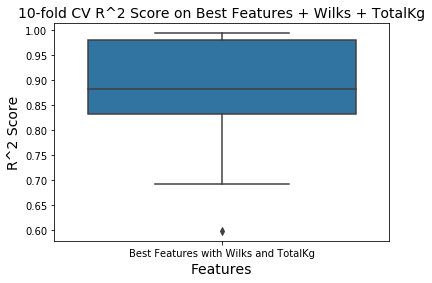

In [206]:
sns.boxplot(
    data=pd.DataFrame(
        x_val_scores_all, 
        columns=['Best Features with Wilks and TotalKg']
    )
)
plt.title('10-fold CV R^2 Score on Best Features + Wilks + TotalKg', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)

## How about 5-fold CV?

In [207]:
x_val_scores_all_5 = cross_val_score(
    estimator=MLPRegressor(
        hidden_layer_sizes=(100, 150, 100),
        alpha=0.0001,
        learning_rate_init=0.0001,
        max_iter=1000
    ),
    X=df[['BestSquatKg',
          'BestDeadliftKg',
          'WeightClassKg',
          'Equipment',
          'Sex',
          'Place',
          'BodyweightKg',
          'Bench4Kg',
          'Name',
          'TotalKg',
          'Wilks']],
    y=df['BestBenchKg'],
    cv=5,
    verbose=2
)

print("5-fold Cross Validation Scores:")
print(x_val_scores_all_5)
print('Mean Score:')
print(x_val_scores_all_5.mean())
print('Median Score:')
print(np.median(x_val_scores_all_5))

[CV]  ................................................................
[CV] ................................................. , total=  20.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.4s remaining:    0.0s


[CV] ................................................. , total=  16.0s
[CV]  ................................................................
[CV] ................................................. , total=  16.2s
[CV]  ................................................................
[CV] ................................................. , total=  18.6s
[CV]  ................................................................
[CV] ................................................. , total=  15.4s
5-fold Cross Validation Scores:
[0.73074319 0.86418422 0.92117583 0.57709914 0.94022474]
Mean Score:
0.8066854260234994
Median Score:
0.8641842221660175


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished


Text(0,0.5,'R^2 Score')

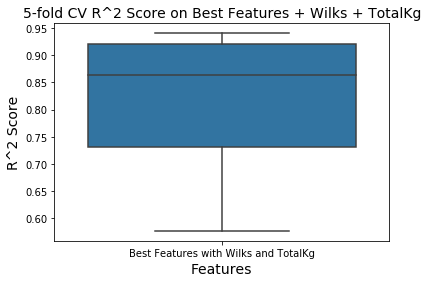

In [208]:
sns.boxplot(
    data=pd.DataFrame(
        x_val_scores_all_5, 
        columns=['Best Features with Wilks and TotalKg']
    )
)
plt.title('5-fold CV R^2 Score on Best Features + Wilks + TotalKg', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('R^2 Score', fontsize=14)